# Functional Gradient Descent in ML & AI: A Unified View and New Applications

Over the past two decades, machine learning (ML) and artificial intelligence (AI) have converged in their core procedures. Whether fitting a linear regression model using stochastic gradient descent (SGD), growing an ensemble of decision trees via gradient boosting (Friedman, 2001), or training a deep convolutional network with back-propagation (LeCun et al., 2015), the underlying process can be viewed as a form of *functional gradient descent* in a chosen function space.

This book, [Functional Gradient Descent for Machine Learning and Artificial Intelligence: A Unified View and New Applications](https://www.amazon.com/dp/B0FL1HH71P/ref=sr_1_3?dib=eyJ2IjoiMSJ9.adBxYDguYGou4xqFszPeNEsIs110XLePjz-Nem33VcAvMvo9cy_yS2fRzCcspA7NGuS1CcxnyfETZmXkVd6R6My2QbivCesMq4r11djx2qpwGe7-HorZCYYDidxIk9Jje1xm6SMxujnks8h5G1wu9yYQGt2U132z3d5lTYF-qYozdyBTBd7S_1xKyeARkrR_OsPraoRlohjMxZOEsFGDOHSONQ3Fdvprgp-ZORWPnTk.EuN5lby4nMrw0kMaebKmxKytxe6QUQ5w4TVaw_KYFYU&dib_tag=se&qid=1754269496&refinements=p_27%3AKyra+Michel&s=books&sr=1-3), explores this unified perspective of the concept of functional gradient descent and its applications to various ML/AI algorithms. This approach can be used to create new applications, such as a Net Present Value (NPV) model for investment decision-making, enhancing financial analysis and real-time parameter tuning.


## Contents Highlights - Key Points:

- **Unified Framework**: Provides a systematic examination of various algorithms to establish a unified framework for functional gradient descent.
- **Versatility of Gradient-Based Methods**: Demonstrates the power and versatility of gradient-based methods in tackling real-world optimization challenges.
- **New Applications**: Introduces a new application—the Net Present Value (NPV) model—which showcases the benefits of automating financial models using this approach.
- **Practical Examples**: Includes practical examples and real-world applications to illustrate the concepts.



## Algorithm Steps

At a high level, every algorithm follows these steps:

1. **Define a Flexible Model Family**:
   - Specify a flexible model family \( F(x; \theta) \) (or multiple interacting families, as in GANs).

2. **Select an Objective Function**:
   - Choose an objective function \( L(\theta) \) (e.g., squared error, cross-entropy, ELBO, adversarial loss).

3. **Compute the Gradient**:
   - Calculate the gradient of \( L \) with respect to the parameters \( \theta \) or the function \( F \).

4. **Perform an Update Step**:
   - Update the parameters using methods like SGD or Adam, or add a new basis function (e.g., tree- or kernel-based learners).

5. **Iterate Until Convergence**:
   - Repeat the process until a stopping criterion is met.




## Linear Model

The first chapter demonstrates the connection between functional gradient descent and parameter gradient descent using linear models and cost functions in machine learning.

### Example Python Code

Code 1 below shows how to implement linear regression using Stochastic Gradient Descent (SGD). The learning process is visualized using a scatter plot of the data points and the fitted line:
`

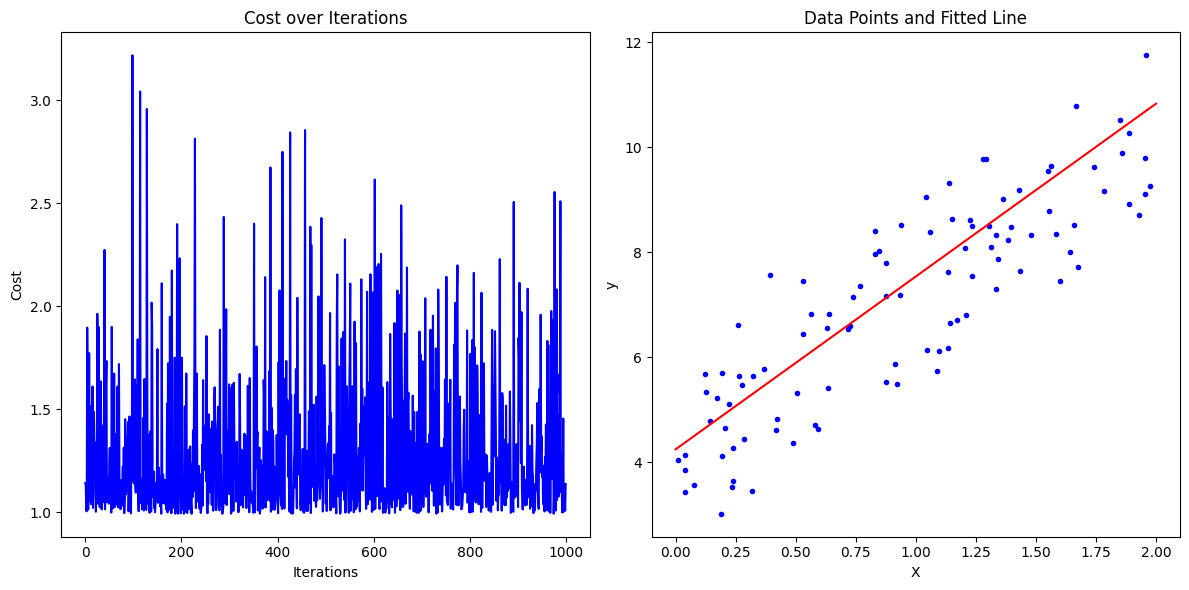

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Learning rate
eta = 0.1

# Number of iterations
n_iterations = 1000

# List to store cost values
cost_history = []

# Stochastic Gradient Descent
for iteration in range(n_iterations):
    for i in range(len(X_b)):
        random_index = np.random.randint(len(X_b))
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - eta * gradients

    # Calculate cost for plotting
    cost = np.mean((X_b.dot(theta) - y) ** 2)
    cost_history.append(cost)

# Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot 1: Cost over iterations
plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')

# Plot 2: Data points and fitted line
plt.subplot(1, 2, 2)
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title('Data Points and Fitted Line')

plt.tight_layout()
plt.show()



### Python Code2

The following code illustrates the functional approach. It demonstrates how the familiar "minimize SSE by gradient descent" recipe is just one instance of the broader functional gradient descent framework:



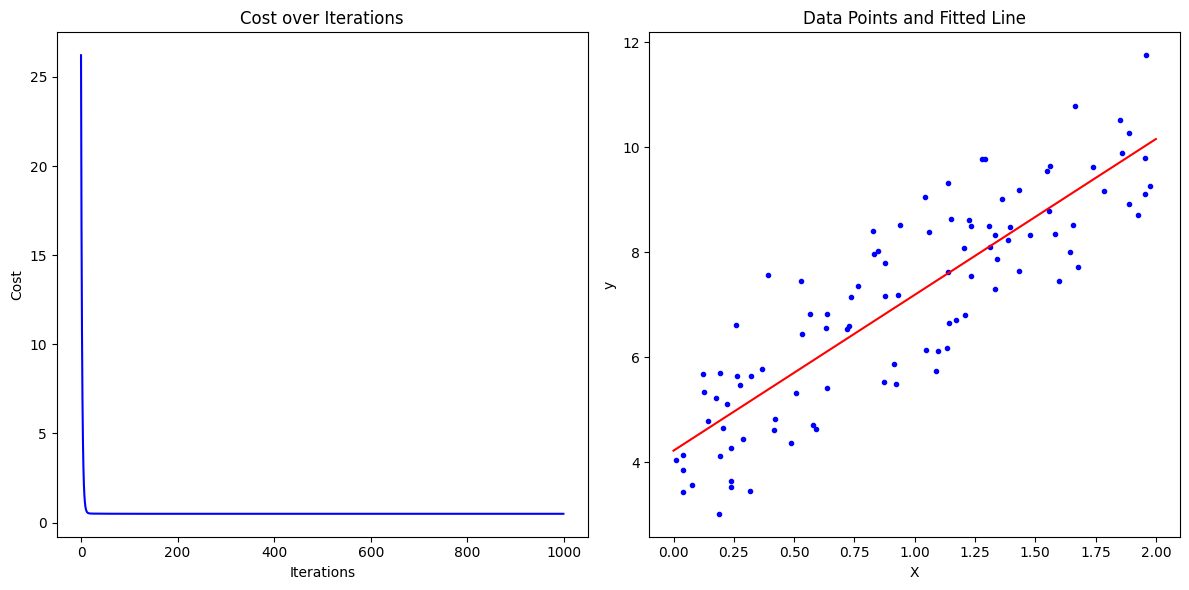

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.random.randn(2, 1)

# Learning rate
eta = 0.1

# Number of iterations
n_iterations = 1000

# List to store cost values
cost_history = []

# Function to compute the cost (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Function to compute the gradient
def compute_gradient(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    gradient = (1 / m) * X.T.dot(error)
    return gradient

# Functional Gradient Descent
def functional_gradient_descent(X, y, theta, eta, n_iterations):
    for iteration in range(n_iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - eta * gradient

        # Calculate cost for plotting
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Perform functional gradient descent
theta, cost_history = functional_gradient_descent(X_b, y, theta, eta, n_iterations)

# Predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot 1: Cost over iterations
plt.subplot(1, 2, 1)
plt.plot(range(n_iterations), cost_history, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')

# Plot 2: Data points and fitted line
plt.subplot(1, 2, 2)
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title('Data Points and Fitted Line')

plt.tight_layout()
plt.show()

## Applications - Last Chapter Highlights

### Functional Gradient Descent for NPV Calculation

The NPV models help buyers determine how much they can afford to pay while achieving their return-on-investment targets, and sellers justify their asking price by demonstrating the discounted value of future cash flows. Functional gradient descent can be used to optimize these NPV models by iteratively adjusting the parameters to minimize the difference between the predicted NPV and the actual NPV.

#### Example: Optimizing NPV Using Functional Gradient Descent

The following code demonstrates how to use functional gradient descent to optimize an NPV model. This example assumes a simple NPV model where the cash flows are known, and the goal is to find the optimal discount rate that maximizes the NPV.



### Steps to Calculate NPV:

1. **Compute the Present Value for Each Cash Flow**:
   For each future cash flow at time $t$, compute its present value as:
   $
   PV_t = \frac{CF_t}{(1 + r)^t}
   $
   where $CF_t$ is the cash flow at time $t$ and $r$ is the discount rate.

2. **Sum Discounted Cash Flows**:
   Sum all discounted inflows and outflows, then subtract:
   $
   NPV = \sum_t PV \text{ inflows}_t - \sum_t PV \text{ outflows}_t
   $



In [3]:
import numpy as np

# Example cash flows and discount rate
cash_flows = np.array([-1000, 300, 400, 500, 600])  # Example cash flows
discount_rate = 0.1  # Discount rate

# Time periods
time_periods = np.arange(len(cash_flows))

# Compute present values
present_values = cash_flows / (1 + discount_rate) ** time_periods

# Calculate NPV
npv = np.sum(present_values)

print(f"Net Present Value (NPV): {npv}")

Net Present Value (NPV): 388.771258793798



### Interpreting the results

The interpretation of NPV results is as follows:

- **NPV > 0**: The investment/project is expected to generate more cash than the cost, indicating it is worth considering.
- **NPV = 0**: The investment/project is expected to break even—neither a gain nor a loss.
- **NPV < 0**: The investment/project is expected to generate less cash than the cost, indicating it may not be a worthwhile consideration.



## NPV model

### Traditional Approach

Traditionally, analysts manually pick a discount rate \( r \), compute NPV in two separate steps each quarter, and adjust assumptions (e.g., \( r \), growth rates, cost estimates) until they are satisfied. This trial-and-error process can be inefficient and time-consuming.

### The New Approach



Instead of manual adjustments, NPV can be treated as a differentiable function of its parameters, using a functional-gradient or automatic differentiation approach. This involves:

1. **Define an NPV Model**:
   Create an NPV model $ M(\theta) $ that computes discounted cash flows given parameters $ \theta $.

2. **Formulate a Loss Function**:
   Define a loss function $ L(\theta) = -M(\theta) $, so minimizing \( L \) maximizes NPV.

3. **Use Automatic Differentiation**:
   Employ software frameworks with automatic differentiation (e.g., PyTorch) and gradient-based optimizers (e.g., SGD, Adam) to update $ \theta $ in real time.

This approach transforms manual tuning into a seamless, data-driven gradient descent process, potentially improving accuracy, reducing manual effort, and adapting faster to new data.




### Python code:

The two Python code snippets both aim to optimize the discount rate to maximize the Net Present Value (NPV) using PyTorch, but they differ in several key aspects. Let's compare them:

Key Differences:

1. **Parameterization of the Discount Rate**:
   - **Code 1**: The discount rate \( r \) is directly parameterized and optimized.
   - **Code 2**: The discount rate \( r \) is parameterized using \( \theta = \text{logit}(r) \), ensuring \( r \) stays within the range (0, 1) using the sigmoid function.

2. **Model Definition**:
   - **Code 1**: Uses a custom `NPVModel` class that inherits from `torch.nn.Module`.
   - **Code 2**: Defines the NPV calculation directly within a function `npv_model`.

3. **Loss Function**:
   - **Code 1**: The loss function is defined as a separate function that takes the discount rate as an input.
   - **Code 2**: The loss function is defined as a separate function that takes the logit of the discount rate as an input.


In [4]:
import torch
import torch.optim as optim

# Cash flow sequence
cashflows = torch.tensor([100.0, 120.0, 140.0, 160.0, 180.0])

# Parameter to learn: the per-period discount rate r
θ = torch.randn(1, requires_grad=True)

# Define the differentiable NPV model M(θ)
def npv_model(logit_r, cf):
    r = torch.sigmoid(logit_r)
    T = cf.shape[0]
    ts = torch.arange(1, T+1, dtype=cf.dtype)
    discounts = 1.0 / (1.0 + r) ** ts
    return torch.dot(cf, discounts)

# Loss function: negative NPV (we want to maximize NPV)
def loss_fn(logit_r, cf):
    return -npv_model(logit_r, cf)

# Set up optimizer
optimizer = optim.Adam([θ], lr=0.1)

# Training loop
for epoch in range(200):
    optimizer.zero_grad()
    loss = loss_fn(θ, cashflows)
    loss.backward()
    optimizer.step()

    if epoch % 25 == 0:
        with torch.no_grad():
            r = torch.sigmoid(θ).item()
            M = npv_model(θ, cashflows).item()
        print(f"Epoch {epoch:3d}: r = {r:.4f}, NPV = {M:.2f}, loss = {loss.item():.2f}")

# Final result
r_learned = torch.sigmoid(θ).item()
npv_final = npv_model(θ, cashflows).item()
print("\nLearned discount rate:", round(r_learned, 4))
print("Maximized NPV:", round(npv_final, 2))


Epoch   0: r = 0.4873, NPV = 221.47, loss = -212.42
Epoch  25: r = 0.0668, NPV = 568.24, loss = -557.41
Epoch  50: r = 0.0118, NPV = 673.60, loss = -672.43
Epoch  75: r = 0.0056, NPV = 687.24, loss = -686.98
Epoch 100: r = 0.0037, NPV = 691.49, loss = -691.37
Epoch 125: r = 0.0028, NPV = 693.68, loss = -693.62
Epoch 150: r = 0.0022, NPV = 695.06, loss = -695.01
Epoch 175: r = 0.0017, NPV = 696.00, loss = -695.96

Learned discount rate: 0.0015
Maximized NPV: 696.65


In [5]:
import torch
import torch.optim as optim

# Define the NPV model
class NPVModel(torch.nn.Module):
    def __init__(self, cash_flows):
        super(NPVModel, self).__init__()
        self.cash_flows = torch.tensor(cash_flows, dtype=torch.float32)

    def forward(self, discount_rate):
        time_periods = torch.arange(len(self.cash_flows), dtype=torch.float32)
        present_values = self.cash_flows / (1 + discount_rate) ** time_periods
        return torch.sum(present_values)

# Example cash flows
cash_flows = [-1000, 300, 400, 500, 600]

# Initialize the model
model = NPVModel(cash_flows)

# Initialize the discount rate as a parameter to be optimized
discount_rate = torch.nn.Parameter(torch.tensor([0.1], dtype=torch.float32), requires_grad=True)

# Optimizer
optimizer = optim.Adam([discount_rate], lr=0.01)

# Loss function
def loss_function(discount_rate):
    npv = model(discount_rate)
    return -npv

# Training loop
num_iterations = 1000
for iteration in range(num_iterations):
    optimizer.zero_grad()
    loss = loss_function(discount_rate)
    loss.backward()
    optimizer.step()

    if (iteration + 1) % 100 == 0:
        print(f"Iteration {iteration + 1}, Loss: {loss.item()}, Discount Rate: {discount_rate.item()}")

# Print the final optimized discount rate
print(f"Final Discount Rate: {discount_rate.item()}")


Iteration 100, Loss: -16688968.0, Discount Rate: -1.0778875350952148
Iteration 200, Loss: -7310350.5, Discount Rate: -1.0934062004089355
Iteration 300, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 400, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 500, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 600, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 700, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 800, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 900, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Iteration 1000, Loss: -7310312.5, Discount Rate: -1.0934062004089355
Final Discount Rate: -1.0934062004089355


### Conclusion

This notebook highlighted the key concepts and applications from the book, [Functional Gradient Descent for Machine Learning and Artificial Intelligence: A Unified View and New Applications](https://www.amazon.com/dp/B0FL1HH71P/ref=sr_1_3?dib=eyJ2IjoiMSJ9.adBxYDguYGou4xqFszPeNEsIs110XLePjz-Nem33VcAvMvo9cy_yS2fRzCcspA7NGuS1CcxnyfETZmXkVd6R6My2QbivCesMq4r11djx2qpwGe7-HorZCYYDidxIk9Jje1xm6SMxujnks8h5G1wu9yYQGt2U132z3d5lTYF-qYozdyBTBd7S_1xKyeARkrR_OsPraoRlohjMxZOEsFGDOHSONQ3Fdvprgp-ZORWPnTk.EuN5lby4nMrw0kMaebKmxKytxe6QUQ5w4TVaw_KYFYU&dib_tag=se&qid=1754269496&refinements=p_27%3AKyra+Michel&s=books&sr=1-3).

By examining various algorithms, we have established a unified framework that highlights the versatility and power of gradient-based methods in tackling real-world optimization challenges. This framework not only unifies different approaches but also opens up new avenues for innovation and application.

The insights gained from this notebook will serve as a valuable resource for researchers and practitioners, encouraging further exploration and innovation in the field. Whether you are a seasoned professional or a curious learner, the concepts and techniques discussed here can be applied to a wide range of problems, from traditional machine learning tasks to cutting-edge AI applications.

For a deeper dive into the concepts and applications discussed, including the new Net Present Value (NPV) model, I invite you to read the full book. Thank you for joining me on this journey through the world of functional gradient descent. I hope you find the insights and applications as exciting and transformative as I do.
